## EDA of cadiovascular diseases data 


#### Data description


| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


### Initial analysis

#### 1. Load necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
df = pd.read_csv("cardio_train.csv",sep=";")

In [2]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Univariate analysis
To understand all our variables, at first, we should look at their datatypes. We can do it with `info()` function:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 decimal number (weight). The second column gives us an idea how big is the dataset and how many non-null values are there for each field. We can use `describe()` to display sample statistics such as `min`, `max`, `mean`,`std` for each attribute:

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df = df.rename(columns={'cardio': 'CVD'})

In [6]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
# check distribution of target variable
df.CVD.value_counts()

CVD
0    35021
1    34979
Name: count, dtype: int64

In [8]:
df_under_40 = df[df['weight'] < 40]
print(df_under_40['weight'].value_counts())

weight
39.00    9
38.00    8
37.00    7
36.00    5
34.00    4
30.00    3
32.00    3
35.00    2
33.00    2
28.00    1
21.00    1
10.00    1
23.00    1
11.00    1
22.00    1
35.45    1
31.00    1
29.00    1
Name: count, dtype: int64


In [9]:
df = df[(df['weight'] >= 40) & (df['weight'] <= 175)]
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD
count,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000,69936.000000
mean,49968.539307,19468.608971,1.349677,164.367965,74.217011,128.825026,96.593571,1.366864,1.226407,0.088166,0.053763,0.803649,0.499743
std,28853.661366,2467.257935,0.476871,8.191590,14.288127,154.080266,188.419254,0.680257,0.572218,0.283539,0.225552,0.397240,0.500004
min,0.000000,10798.000000,1.000000,55.000000,40.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24997.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49997.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74885.250000,21326.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,175.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print(df['weight'].unique())

[ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.
  61.    48.    54.    51.    47.    91.   104.    81.    98.   108.
  89.   101.    86.    65.5  142.    96.    44.    41.   169.   116.
  64.8  120.   117.   125.   106.   114.   113.   129.   124.    42.
 123.   111.   102.   109.    46.   139.   150.   138.   131.    43.
  83.6  134.   106.5  121.    40.   141.   119.   126.   165.   122.
  62.3  118.    89.5  132.   155.   130.   159.    84.6  140.    82.3
  67.9  127.    67.5   74.3  149.   128.    60.2   64.5   58.7   90.5
  80.8  166.   161.    92.2   75.6  136.    82.9  154.    68.9  170.
  84.5  135.    72.5  146.    70.5   74.2   84.3   54.5  145.    68.5
  79.5   72.8   73.2   96.5   5

In [11]:
df = df[df['height'] >= 100]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD
count,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000
mean,49969.432626,19468.750672,1.349674,164.404575,74.215987,128.830577,96.601290,1.366982,1.226498,0.088159,0.053771,0.803685,0.499785
std,28853.892704,2467.196127,0.476870,7.982558,14.276457,154.109517,188.456299,0.680327,0.572315,0.283528,0.225566,0.397213,0.500004
min,0.000000,10798.000000,1.000000,100.000000,40.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25001.500000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74886.750000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,175.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### From what we can see of the 70,000 cases the dataset is fairly balanced with those who have CVD and those who don't.

<Axes: >

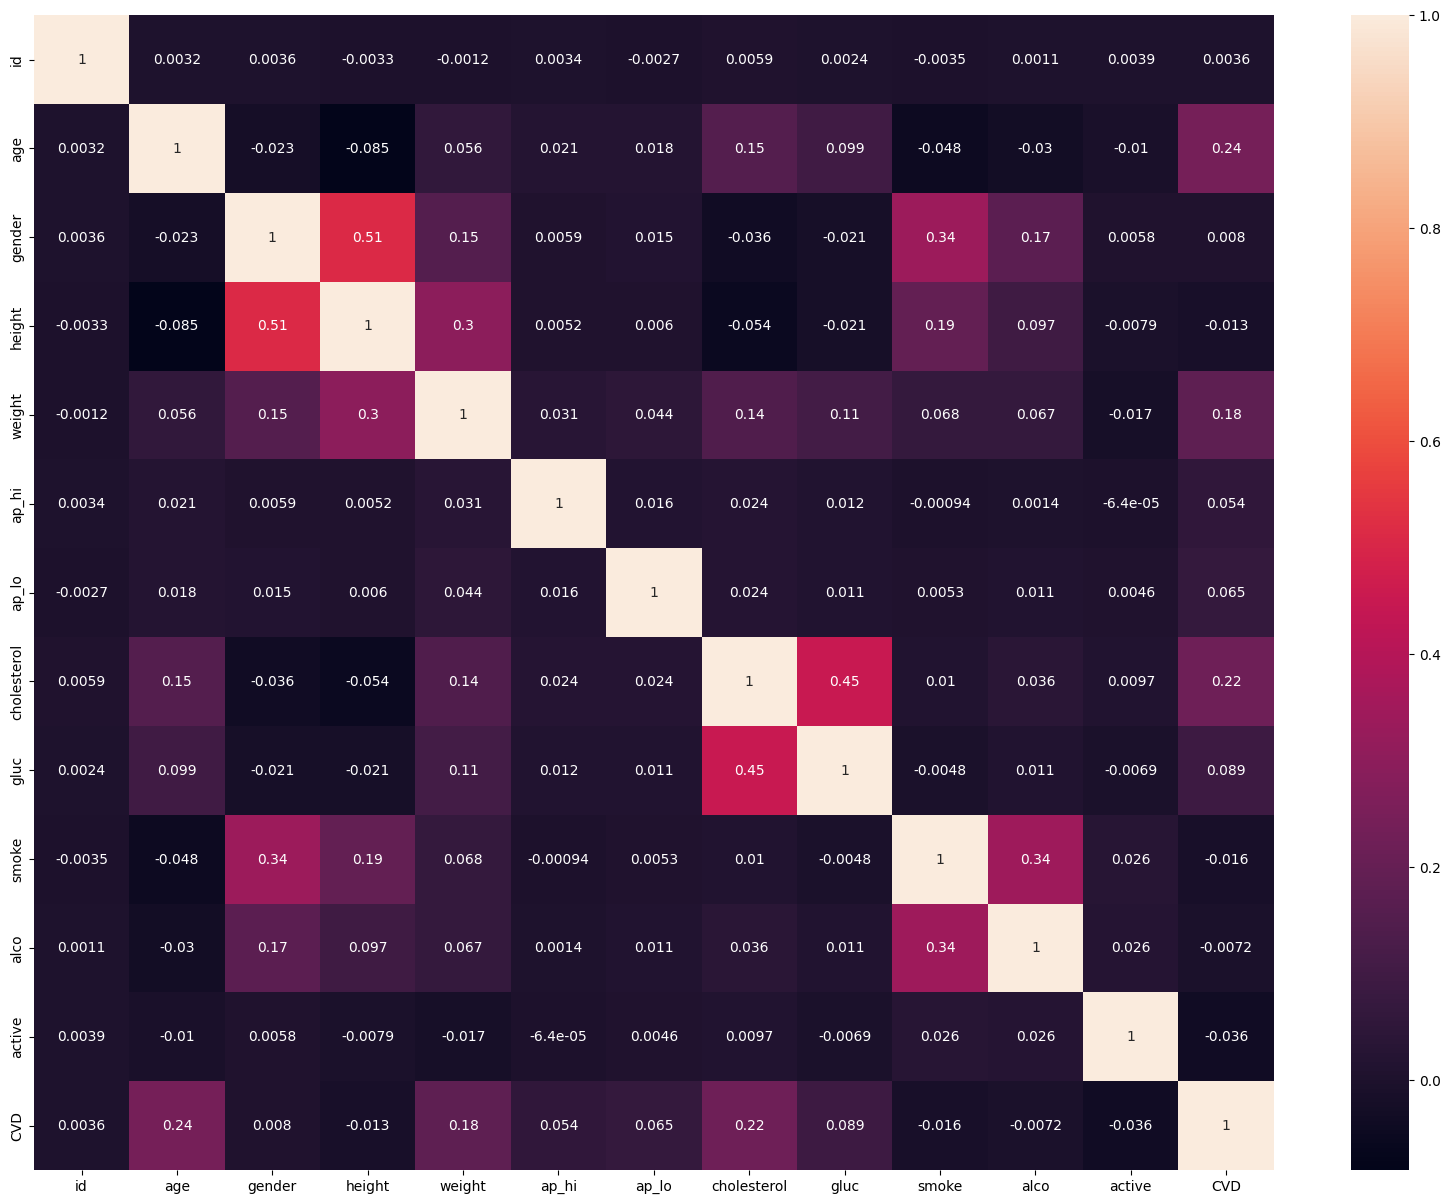

In [12]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

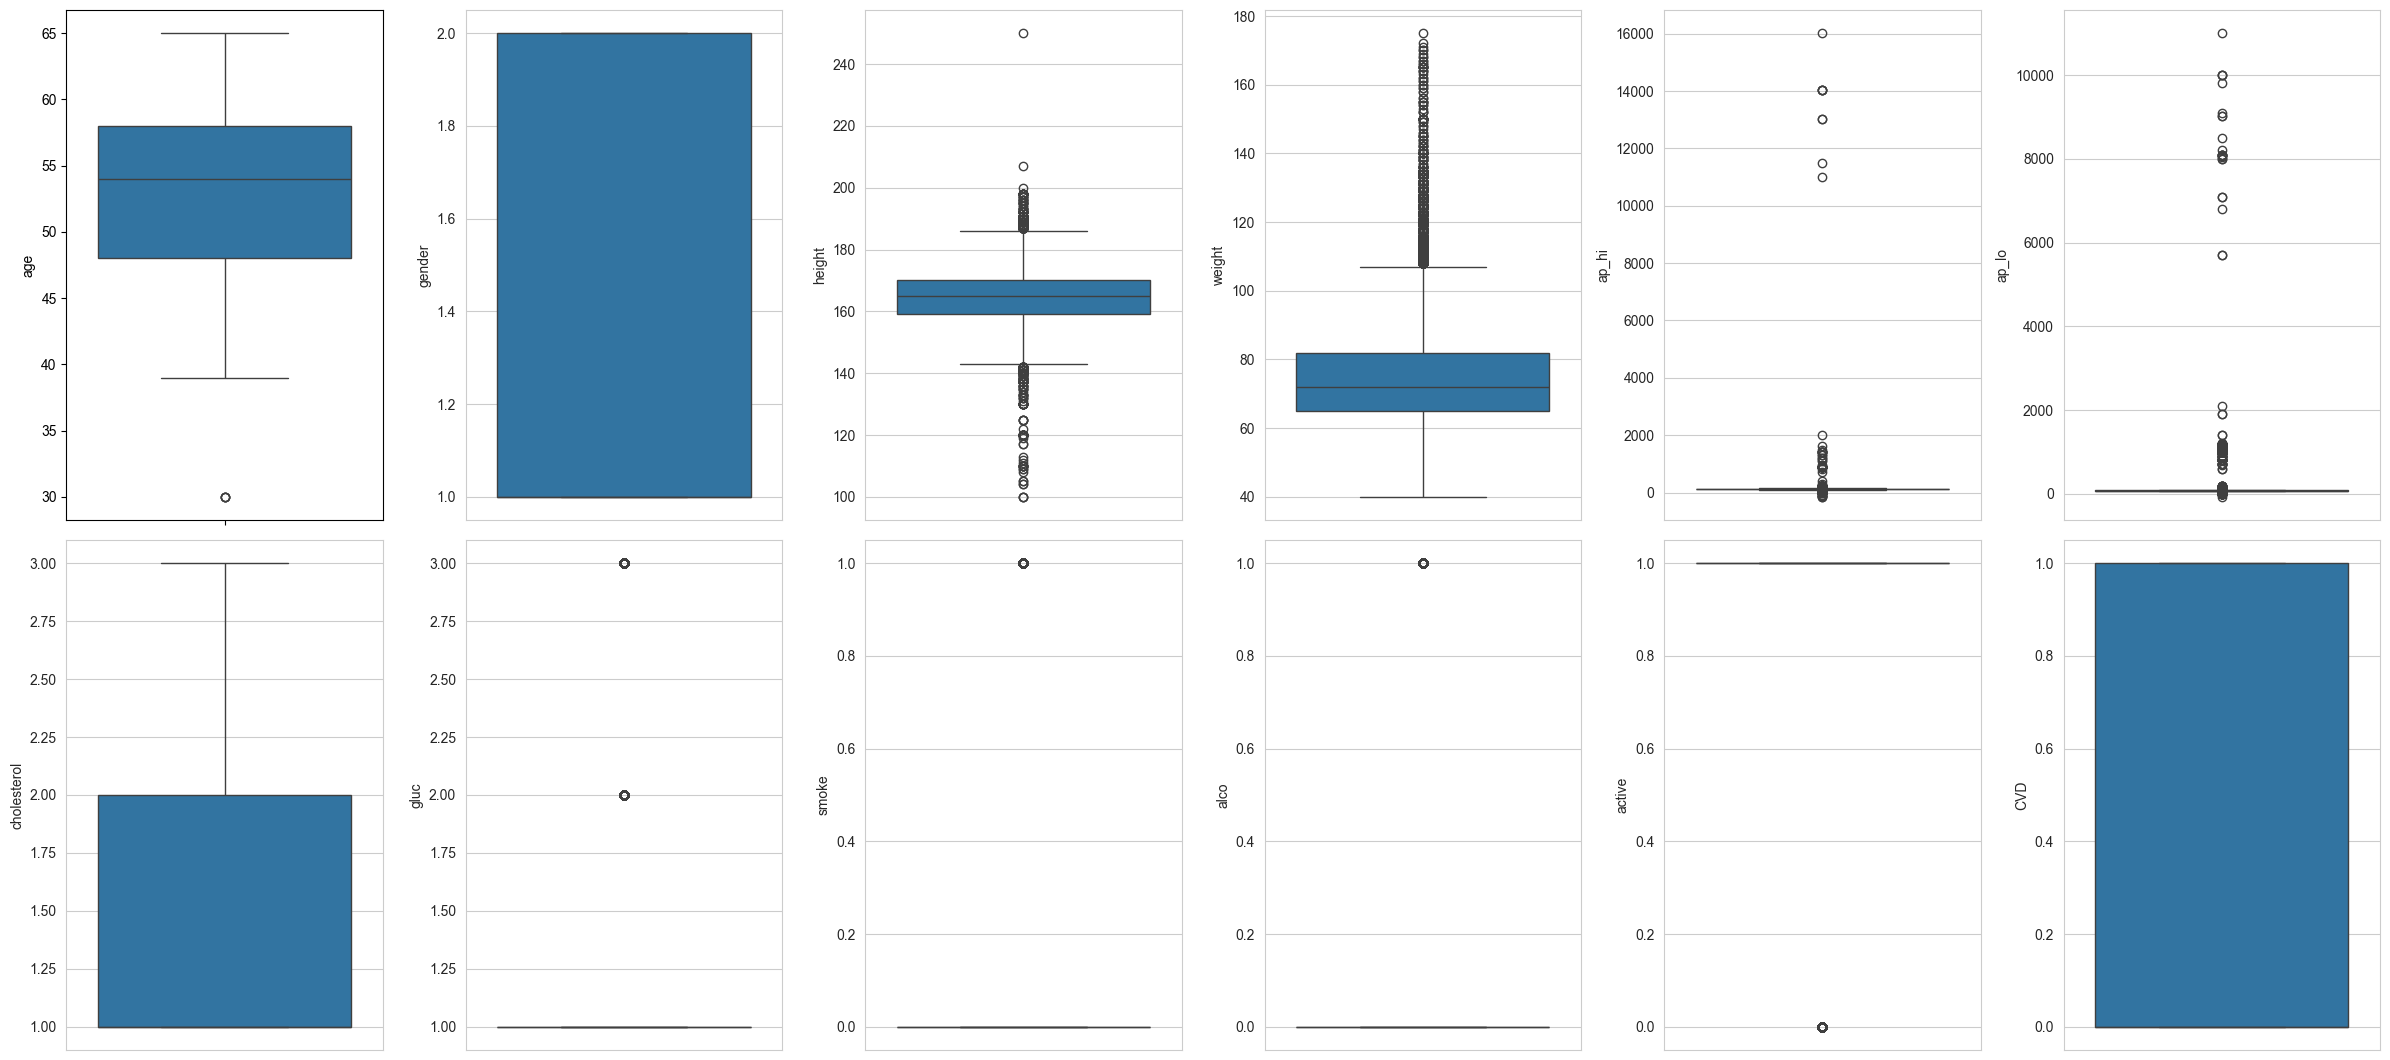

In [13]:
# check outliers
df['age'] = (df['age'] / 365).round().astype('int')

def check_outliers(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)//2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)

C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\768570510.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[l[i]],kde=True)
C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\768570510.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[l[i]],kde=True)
C:\Users\jorda\AppData\Local\Temp\

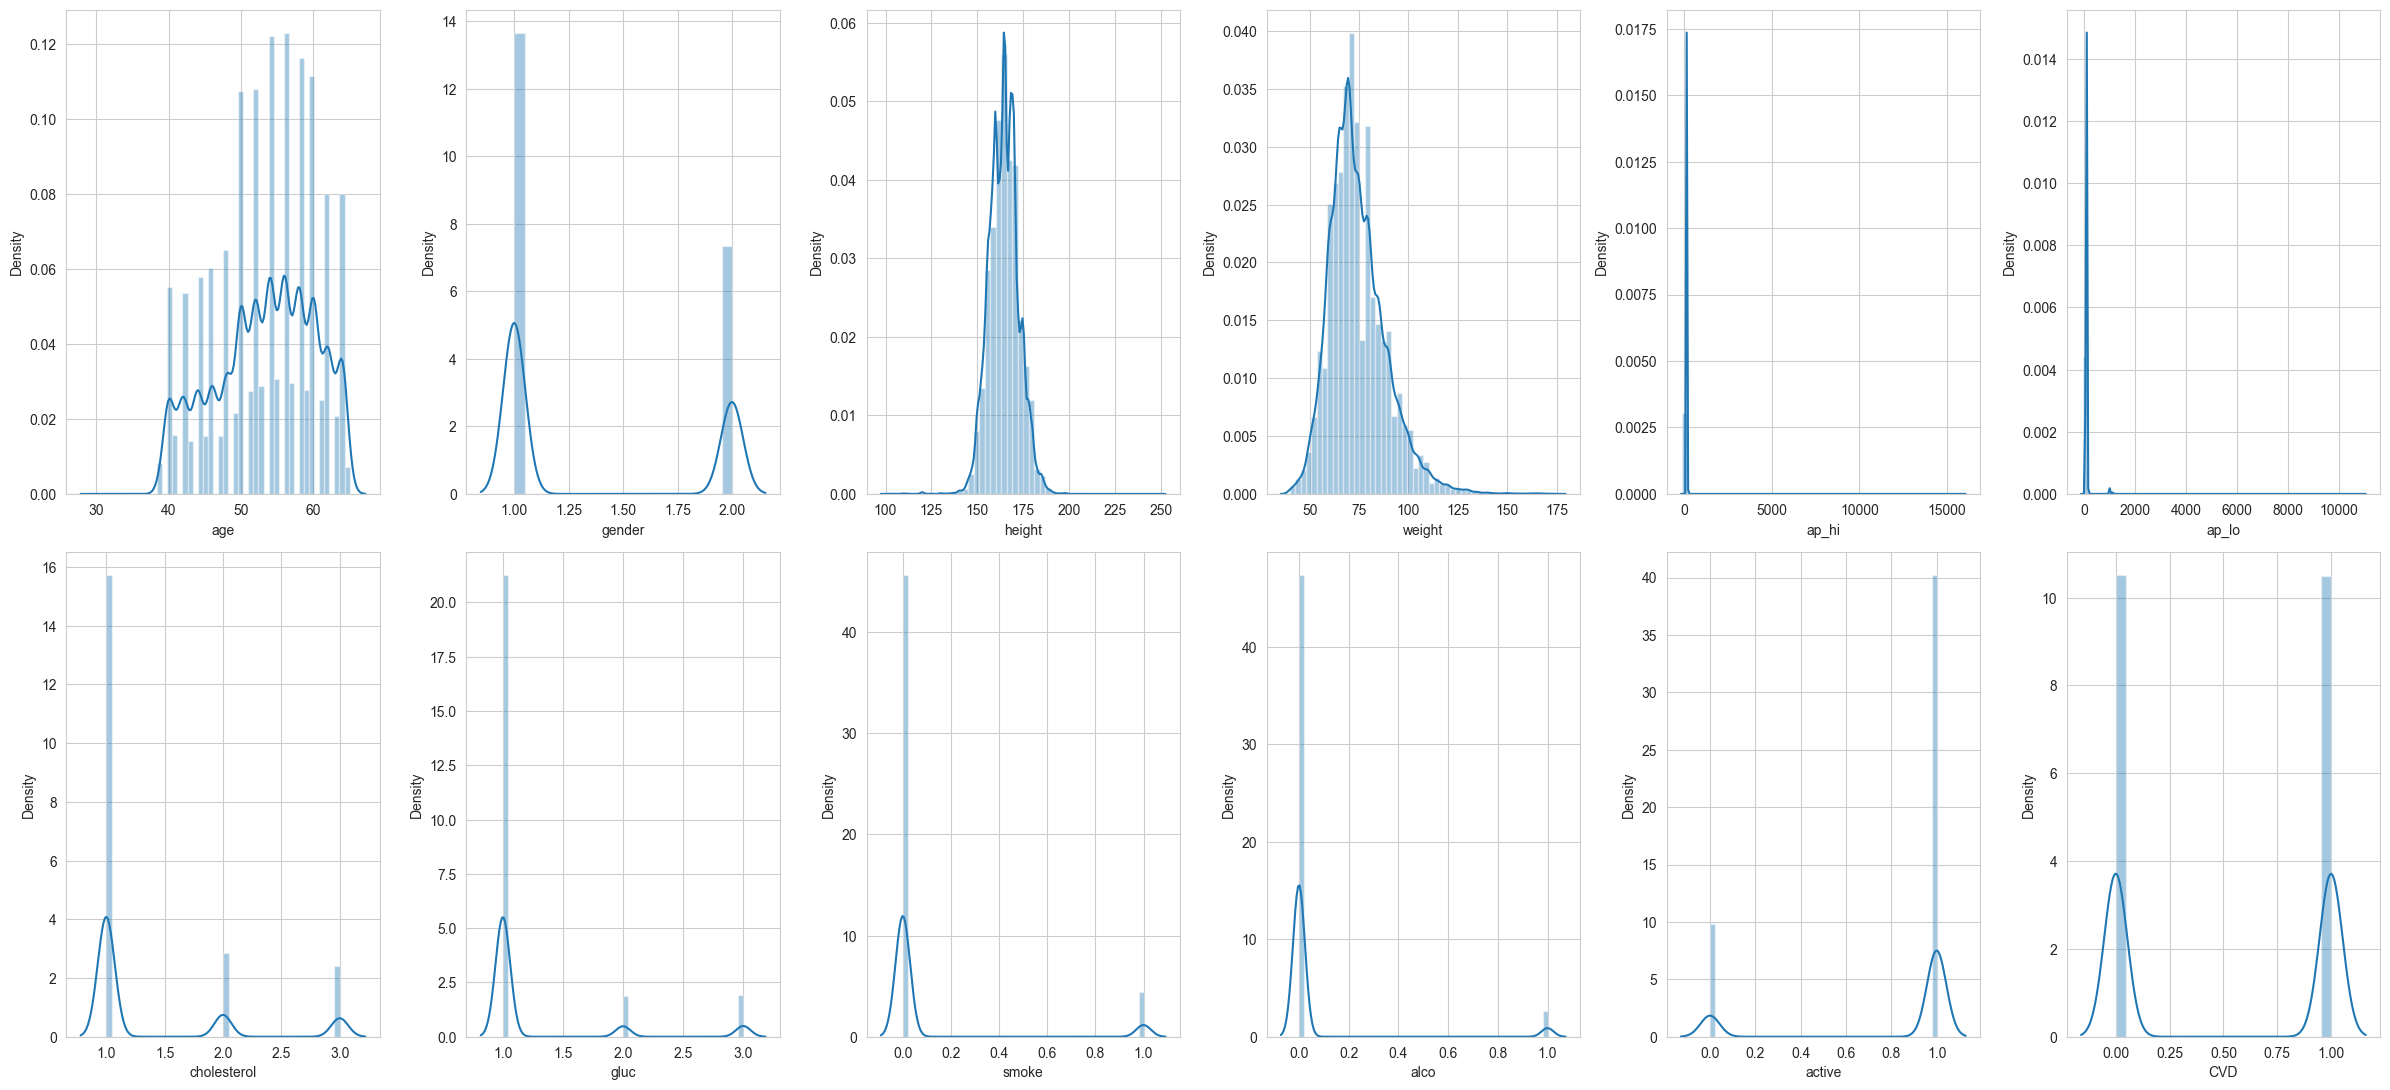

In [14]:

def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)//2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(df[l[i]],kde=True) 
        plt.tight_layout()
        
check_dist(df)

In [15]:
# remove outliers in ap_hi and ap_lo
cleaned_df = df[df['ap_hi'] < 250]  
cleaned_df = df[df['ap_lo'] < 250] 

cleaned_df.shape

(68959, 13)

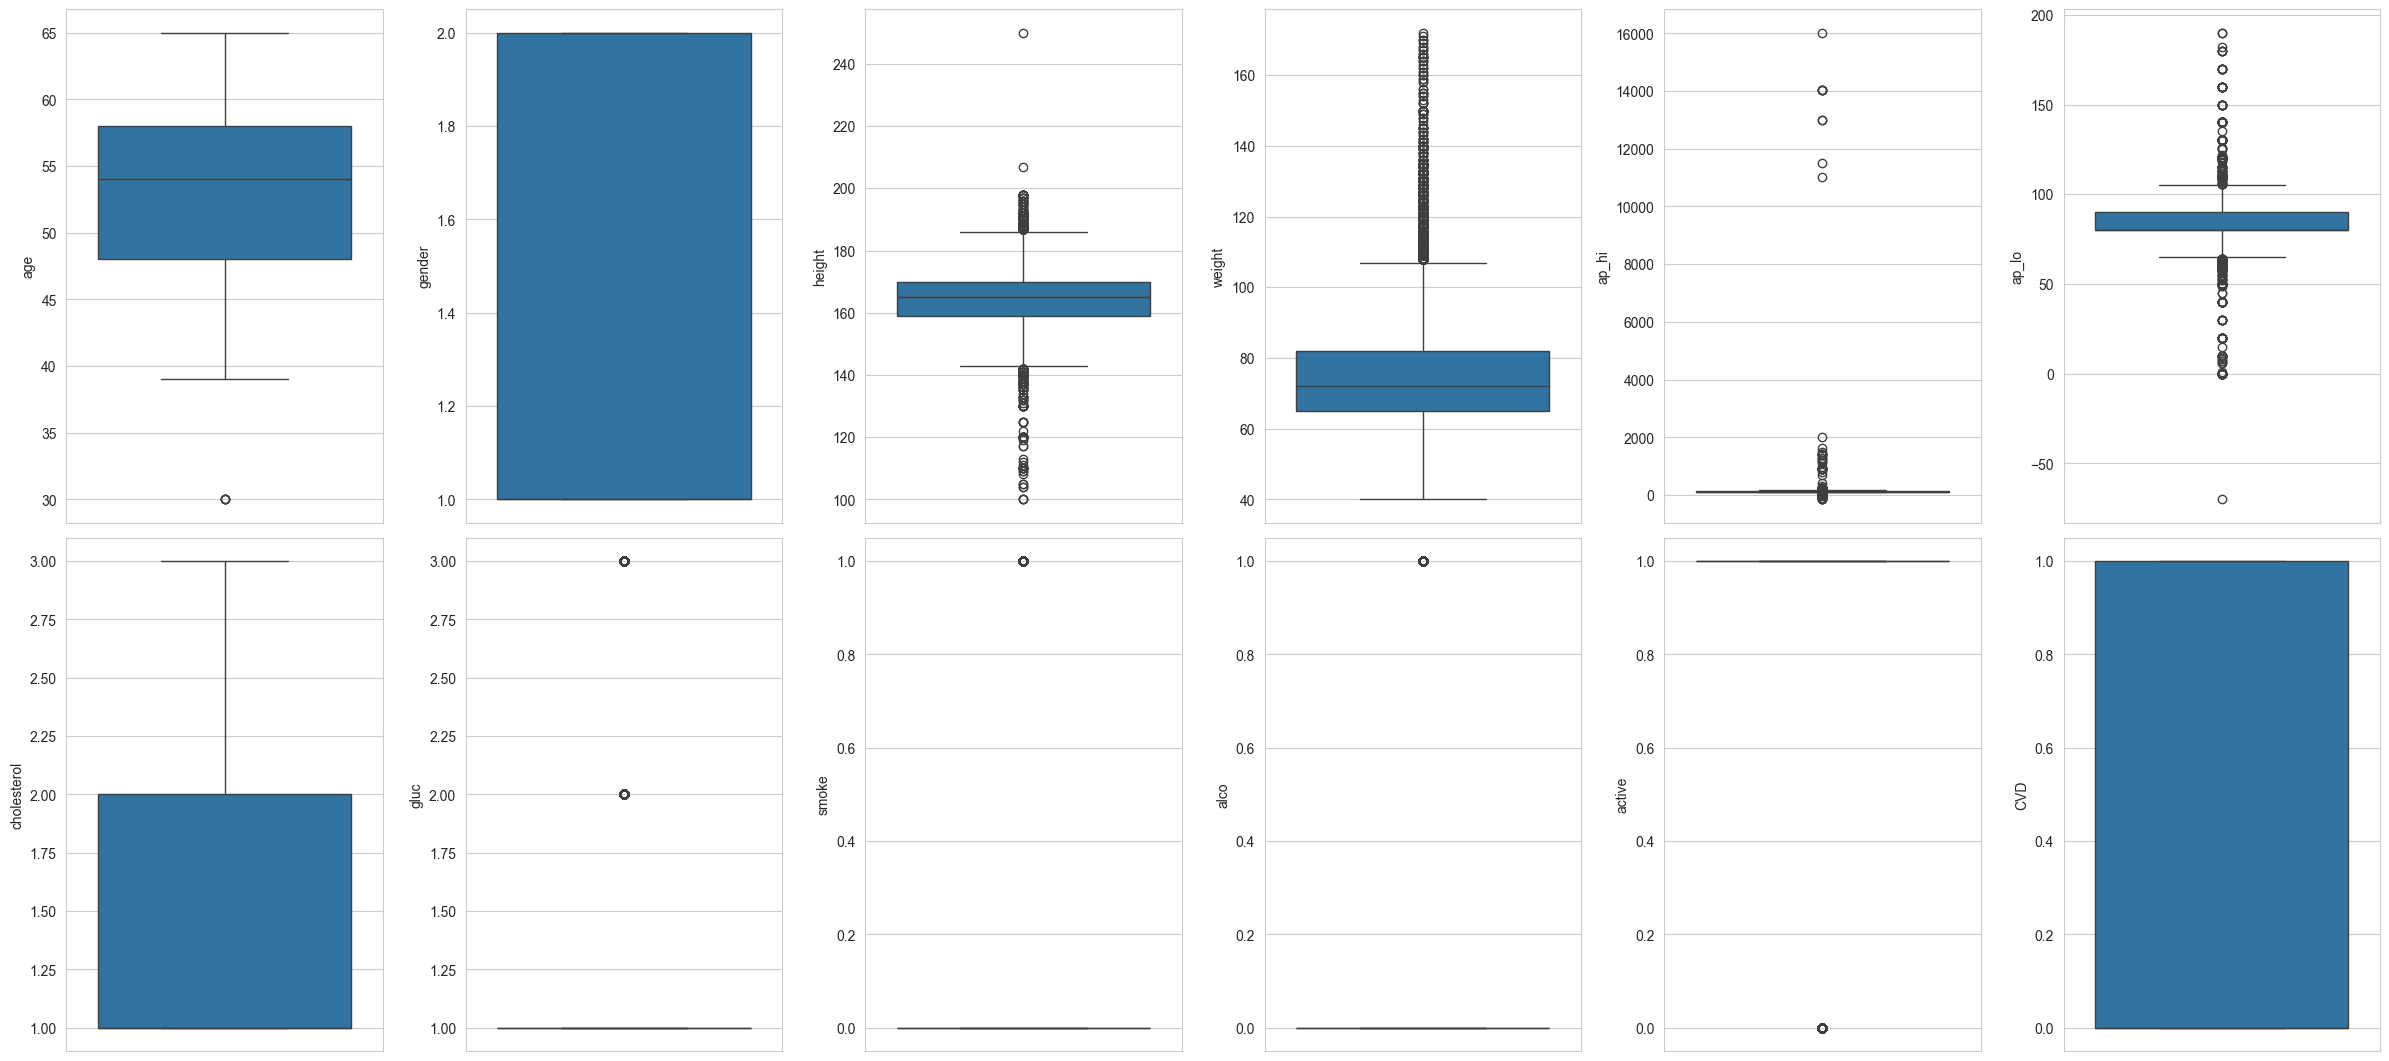

In [16]:
check_outliers(cleaned_df)

C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\768570510.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[l[i]],kde=True)
C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\768570510.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[l[i]],kde=True)
C:\Users\jorda\AppData\Local\Temp\

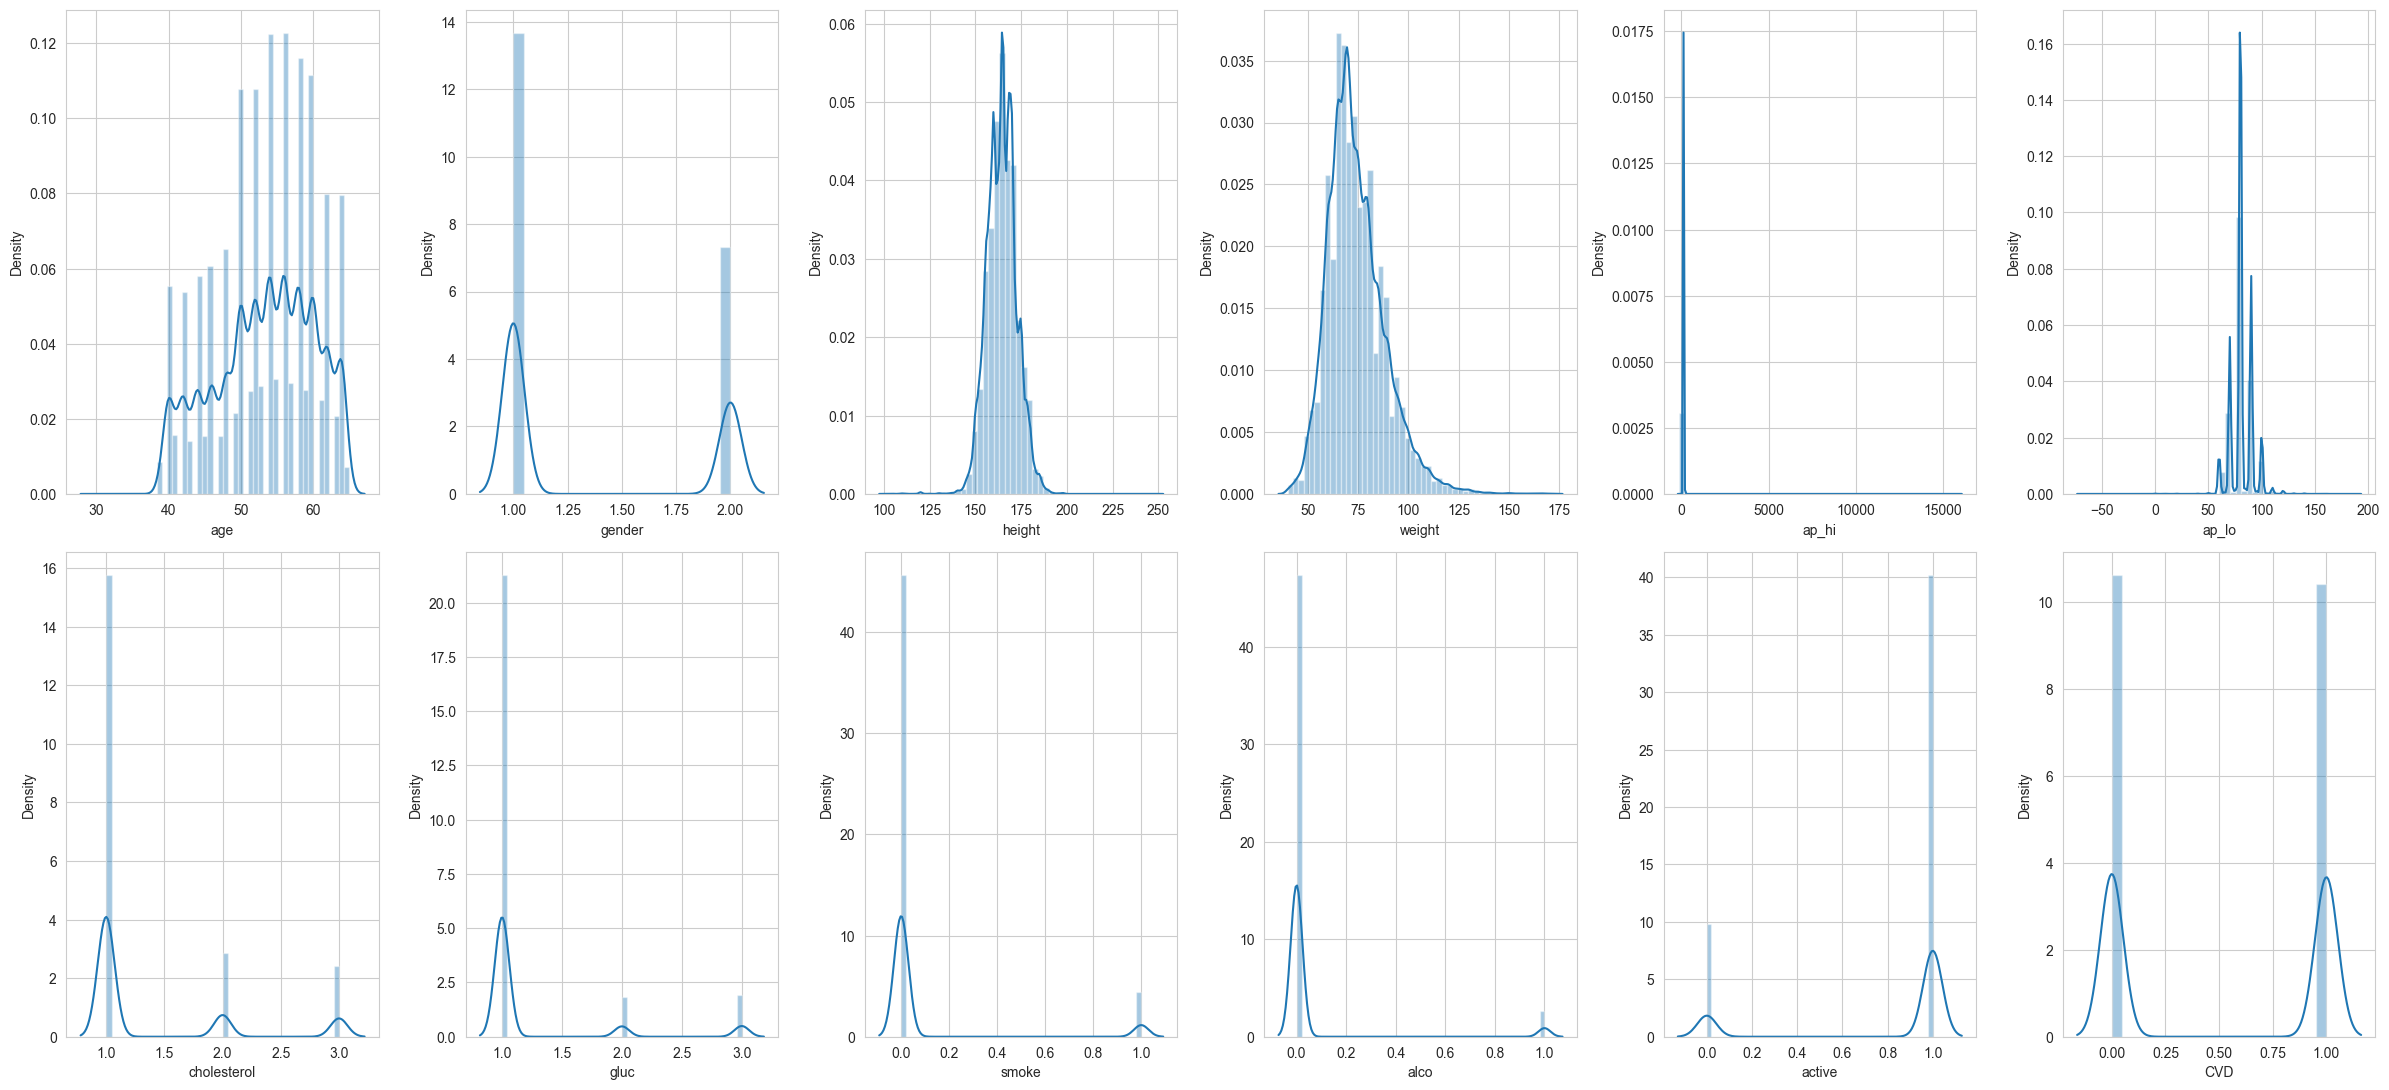

In [17]:
check_dist(cleaned_df)

In [18]:
cleaned_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


## Distribution of Age

### At what age does the number of people with CVD exceed the number of people without CVD?

In [19]:
unique_years = cleaned_df['age'].unique()
unique_years

age_distribution = cleaned_df['age'].value_counts().sort_index()
print("Age distribution:")

age_distribution

Age distribution:


age
30       4
39     404
40    2679
41     755
42    2593
43     678
44    2803
45     747
46    2924
47     742
48    3150
49    1044
50    5203
51    1329
52    5209
53    1384
54    5906
55    1482
56    5930
57    1424
58    5602
59    1330
60    5388
61    1201
62    3858
63     999
64    3846
65     345
Name: count, dtype: int64

### The plot below shows the distribution of age within the dataset. Age can be a significant factor in cardiovascular health providing insights into how different age groups correlate with disease presence.

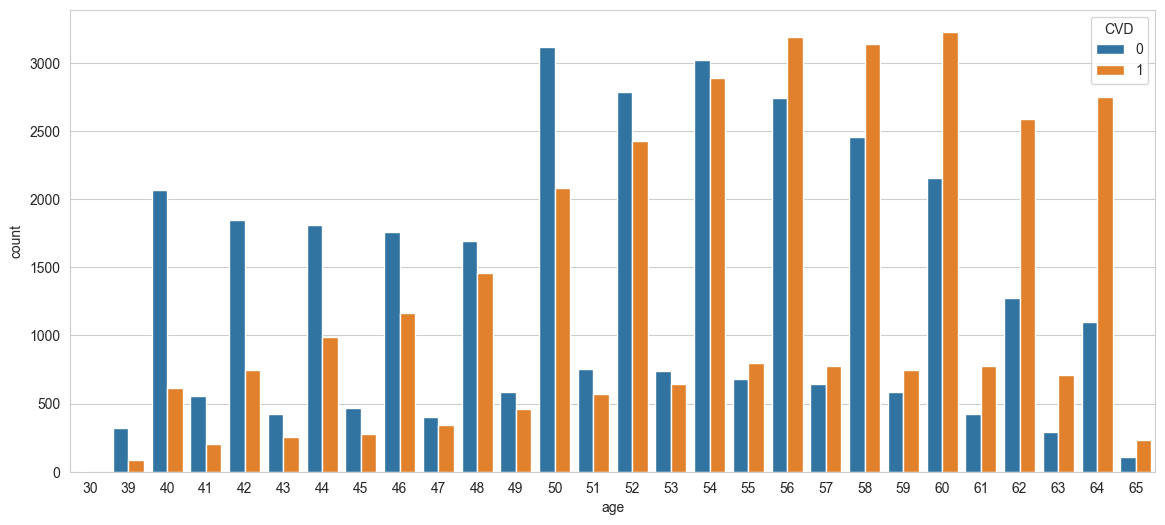

In [20]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 6
sns.countplot(x='age', hue='CVD', data = cleaned_df,);

In [21]:
cleaned_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


It can be observed that people over 55 of age are more exposed to CVD. We can also see a much larger difference in counts for Even and Odd ages. We can't give a clear reason for this as it could be human nature to check things at regular intervals or could be intentional from a medical perspective. We can clearly see that Age is a defining factor in the presence of CVD but whether or not it is the cause remains to be seen. What tends to happen as we get older?


Let's look at categorical variables in the dataset and their distribution:

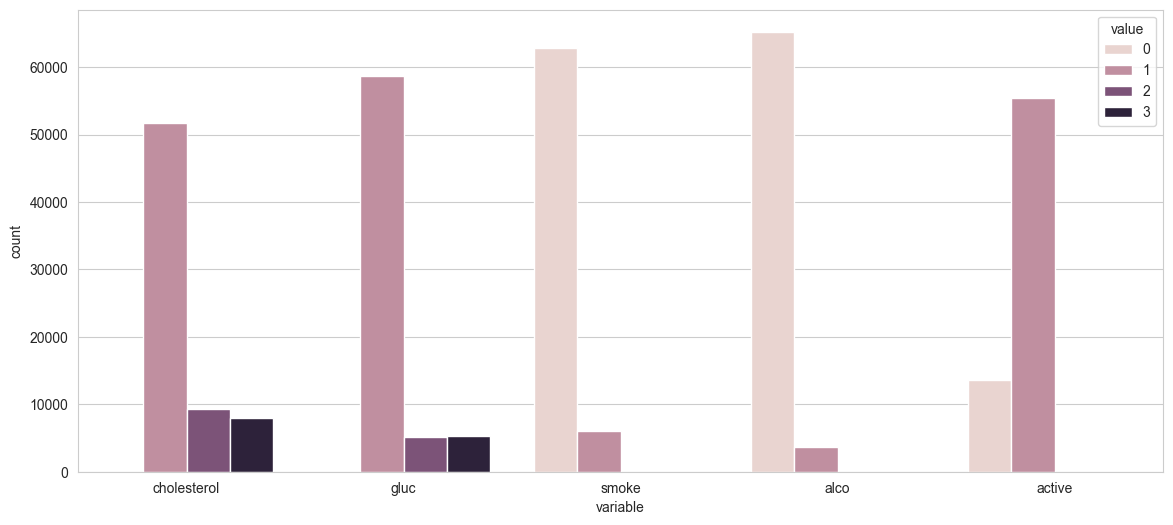

In [22]:
df_categorical = cleaned_df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

#### Bivariate analysis

It may be useful to split categorical variables by target class:

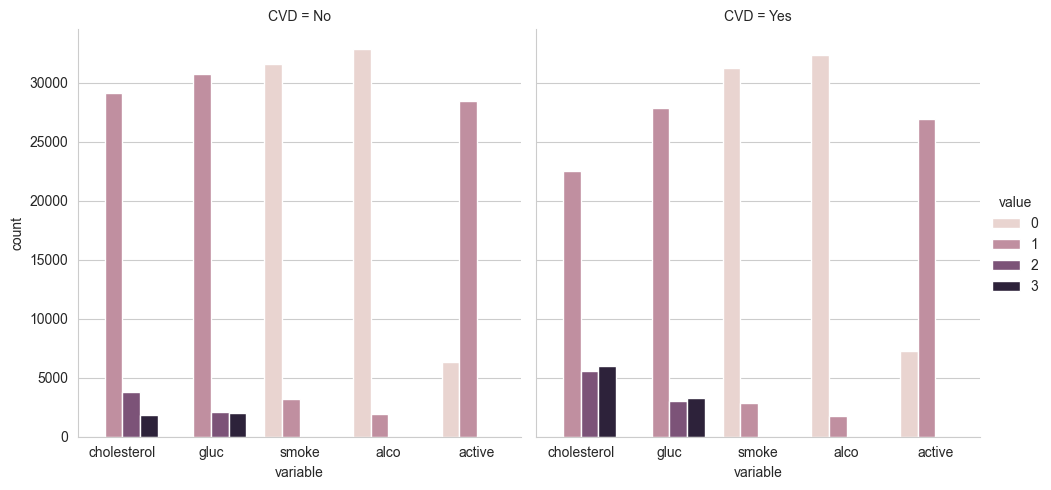

In [23]:
# Melt the dataframe to include cardio and other variables
df_melted = pd.melt(cleaned_df, id_vars=['CVD'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])

# Convert cardio into a string format
df_melted['CVD'] = df_melted['CVD'].apply(lambda x: "Yes" if x == 1 else "No")

# Create categorical plot, with different organization
sns.catplot(x="variable", hue="value", col="CVD", data=df_melted, kind="count")

# Display plot
plt.show()

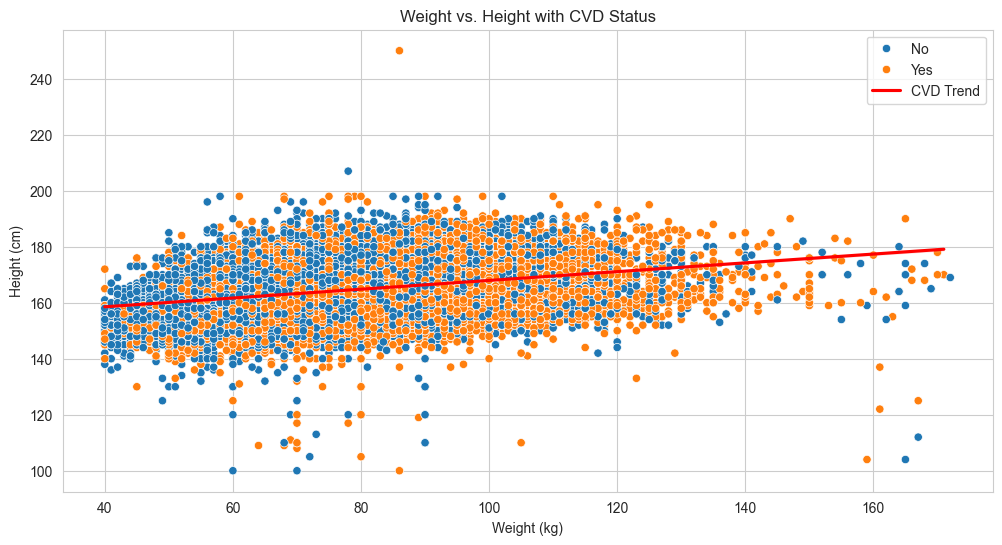

In [24]:
cleaned_df_scatter = cleaned_df.copy()

# Convert CVD to binary format for plotting, if needed
cleaned_df_scatter['CVD'] = cleaned_df_scatter['CVD'].apply(lambda x: "Yes" if x == 1 else "No")

# Separate dataframes for CVD "Yes"
df_yes = cleaned_df_scatter[cleaned_df_scatter['CVD'] == "Yes"]

# Scatter plot comparing weight and height
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_scatter, x="weight", y="height", hue="CVD")

# Trend line for CVD "Yes"
sns.regplot(data=df_yes, x="weight", y="height", scatter=False, color="red", label="CVD Trend")

# Titles and labels
plt.title("Weight vs. Height with CVD Status")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

plt.legend()

# Display plot
plt.show()

In [25]:
cleaned_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD
count,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000
mean,49967.896924,53.324323,1.348801,164.405197,74.125037,128.476559,81.329152,1.364521,1.225844,0.087835,0.053583,0.803303,0.495062
std,28848.229287,6.768295,0.476594,7.972858,14.215451,155.119967,9.918065,0.678718,0.571807,0.283057,0.225194,0.397504,0.499979
min,0.000000,30.000000,1.000000,100.000000,40.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24997.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50016.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74859.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,172.000000,16020.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [26]:
cleaned_df.groupby('gender')['height'].mean()

gender
1    161.41765
2    169.98283
Name: height, dtype: float64

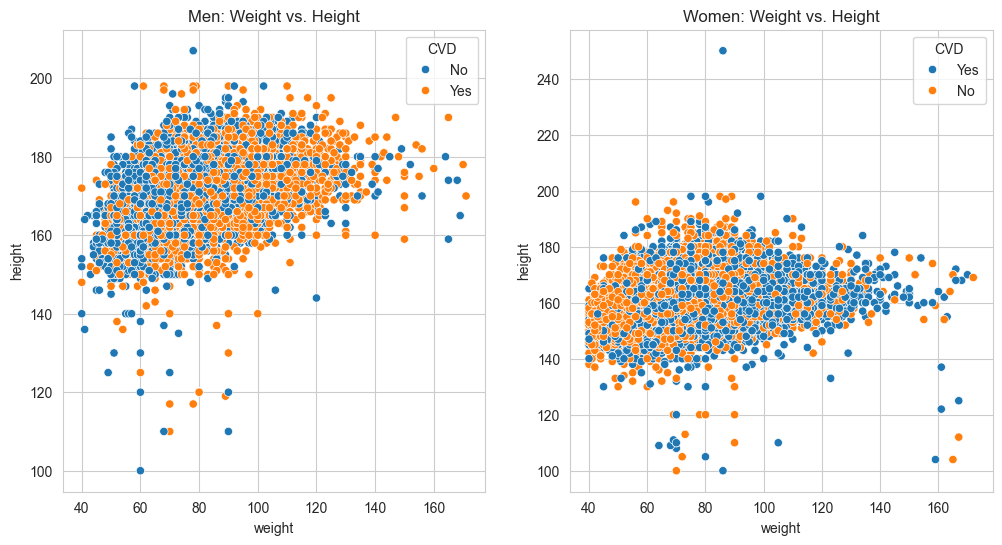

In [27]:
# We want to  make a temporary mapping for gender, because for our model we still need numeric values
cleaned_df_copy = cleaned_df.copy()
cleaned_df_copy['gender'] = cleaned_df_copy['gender'].apply(lambda x: "Male" if x == 2 else "Female")

cleaned_df_copy['CVD'] = cleaned_df_copy['CVD'].apply(lambda x: "Yes" if x == 1 else "No")

# Separate dataframes by gender
df_male = cleaned_df_copy[cleaned_df_copy['gender'] == "Male"]
df_female = cleaned_df_copy[cleaned_df_copy['gender'] == "Female"]

# Create scatter plots separately
plt.figure(figsize=(12, 6))

# Plot for men
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_male, x="weight", y="height", hue="CVD")
plt.title("Men: Weight vs. Height")

# Plot for women
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_female, x="weight", y="height", hue="CVD")
plt.title("Women: Weight vs. Height")

# Display plots
plt.show()


Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women. Let's see how many men and women presented in the dataset:

In [28]:
cleaned_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD
count,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000
mean,49967.896924,53.324323,1.348801,164.405197,74.125037,128.476559,81.329152,1.364521,1.225844,0.087835,0.053583,0.803303,0.495062
std,28848.229287,6.768295,0.476594,7.972858,14.215451,155.119967,9.918065,0.678718,0.571807,0.283057,0.225194,0.397504,0.499979
min,0.000000,30.000000,1.000000,100.000000,40.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24997.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50016.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74859.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,172.000000,16020.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
cleaned_df['gender'].value_counts()

gender
1    44906
2    24053
Name: count, dtype: int64

Who more often report consuming alcohol - men or women?

In [30]:
cleaned_df.groupby('gender')['alco'].sum()

gender
1    1142
2    2553
Name: alco, dtype: int64

So, men consume alcohol more frequently on average. 
Next, the target variables are balanced:`

In [31]:
cleaned_df['CVD'].value_counts(normalize=True)

CVD
0    0.504938
1    0.495062
Name: proportion, dtype: float64

To see how the target class is distributed among men and women, we can use also `crosstab`

In [32]:
pd.crosstab(cleaned_df['CVD'],cleaned_df['gender'],normalize=True)

gender,1,2
CVD,,
0,0.330573,0.174364
1,0.320625,0.174437


### Cleaning Data

Are there any `NA`s or missing values in a dataset?

In [33]:
cleaned_df.isnull().values.any()

False

If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

In [34]:
cleaned_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD
count,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000,68959.000000
mean,49967.896924,53.324323,1.348801,164.405197,74.125037,128.476559,81.329152,1.364521,1.225844,0.087835,0.053583,0.803303,0.495062
std,28848.229287,6.768295,0.476594,7.972858,14.215451,155.119967,9.918065,0.678718,0.571807,0.283057,0.225194,0.397504,0.499979
min,0.000000,30.000000,1.000000,100.000000,40.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24997.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50016.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74859.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,172.000000,16020.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
cleaned_df.drop(cleaned_df[(cleaned_df['height'] > cleaned_df['height'].quantile(0.98)) | (cleaned_df['height'] < cleaned_df['height'].quantile(0.02))].index,inplace=True)
cleaned_df.drop(cleaned_df[(cleaned_df['weight'] > cleaned_df['weight'].quantile(0.98)) | (cleaned_df['weight'] < cleaned_df['weight'].quantile(0.02))].index,inplace=True)

C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\77990970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(cleaned_df[(cleaned_df['height'] > cleaned_df['height'].quantile(0.98)) | (cleaned_df['height'] < cleaned_df['height'].quantile(0.02))].index,inplace=True)
C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\77990970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(cleaned_df[(cleaned_df['weight'] > cleaned_df['weight'].quantile(0.98)) | (cleaned_df['weight'] < cleaned_df['weight'].quantile(0.02))].index,inplace=True)


In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?

In [36]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(cleaned_df[cleaned_df['ap_lo']> cleaned_df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 257 cases


Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [37]:
cleaned_df.drop(cleaned_df[(cleaned_df['ap_hi'] > cleaned_df['ap_hi'].quantile(0.995)) | (cleaned_df['ap_hi'] < cleaned_df['ap_hi'].quantile(0.005))].index,inplace=True)
cleaned_df.drop(cleaned_df[(cleaned_df['ap_lo'] > cleaned_df['ap_lo'].quantile(0.995)) | (cleaned_df['ap_lo'] < cleaned_df['ap_lo'].quantile(0.005))].index,inplace=True)

C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\714856429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(cleaned_df[(cleaned_df['ap_hi'] > cleaned_df['ap_hi'].quantile(0.995)) | (cleaned_df['ap_hi'] < cleaned_df['ap_hi'].quantile(0.005))].index,inplace=True)
C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\714856429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(cleaned_df[(cleaned_df['ap_lo'] > cleaned_df['ap_lo'].quantile(0.995)) | (cleaned_df['ap_lo'] < cleaned_df['ap_lo'].quantile(0.005))].index,inplace=True)


Diastilic pressure is higher than systolic one in 2 cases


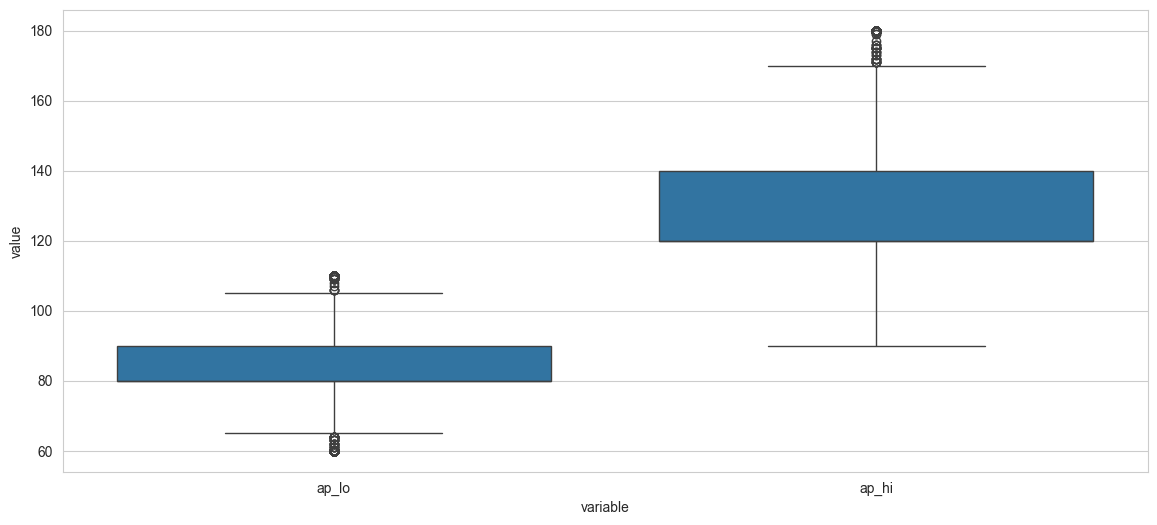

In [38]:
blood_pressure = cleaned_df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(cleaned_df[cleaned_df['ap_lo']> cleaned_df['ap_hi']].shape[0]))

#### Multivariate analysis
It might be useful to consider correation matrix:

As we can see age and cholesterol have significant impact, but not very high correlated with target class.

Let's create a new feature - Body Mass Index (BMI):

$$BMI = \frac {mass_{kg}} {height ^2_{m}},$$

and compare average BMI for healthy people to average BMI of ill people. Normal BMI values are said to be from 18.5 to 25.

C:\Users\jorda\AppData\Local\Temp\ipykernel_35084\2773157111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['BMI'] = cleaned_df['weight']/((cleaned_df['height']/100)**2)


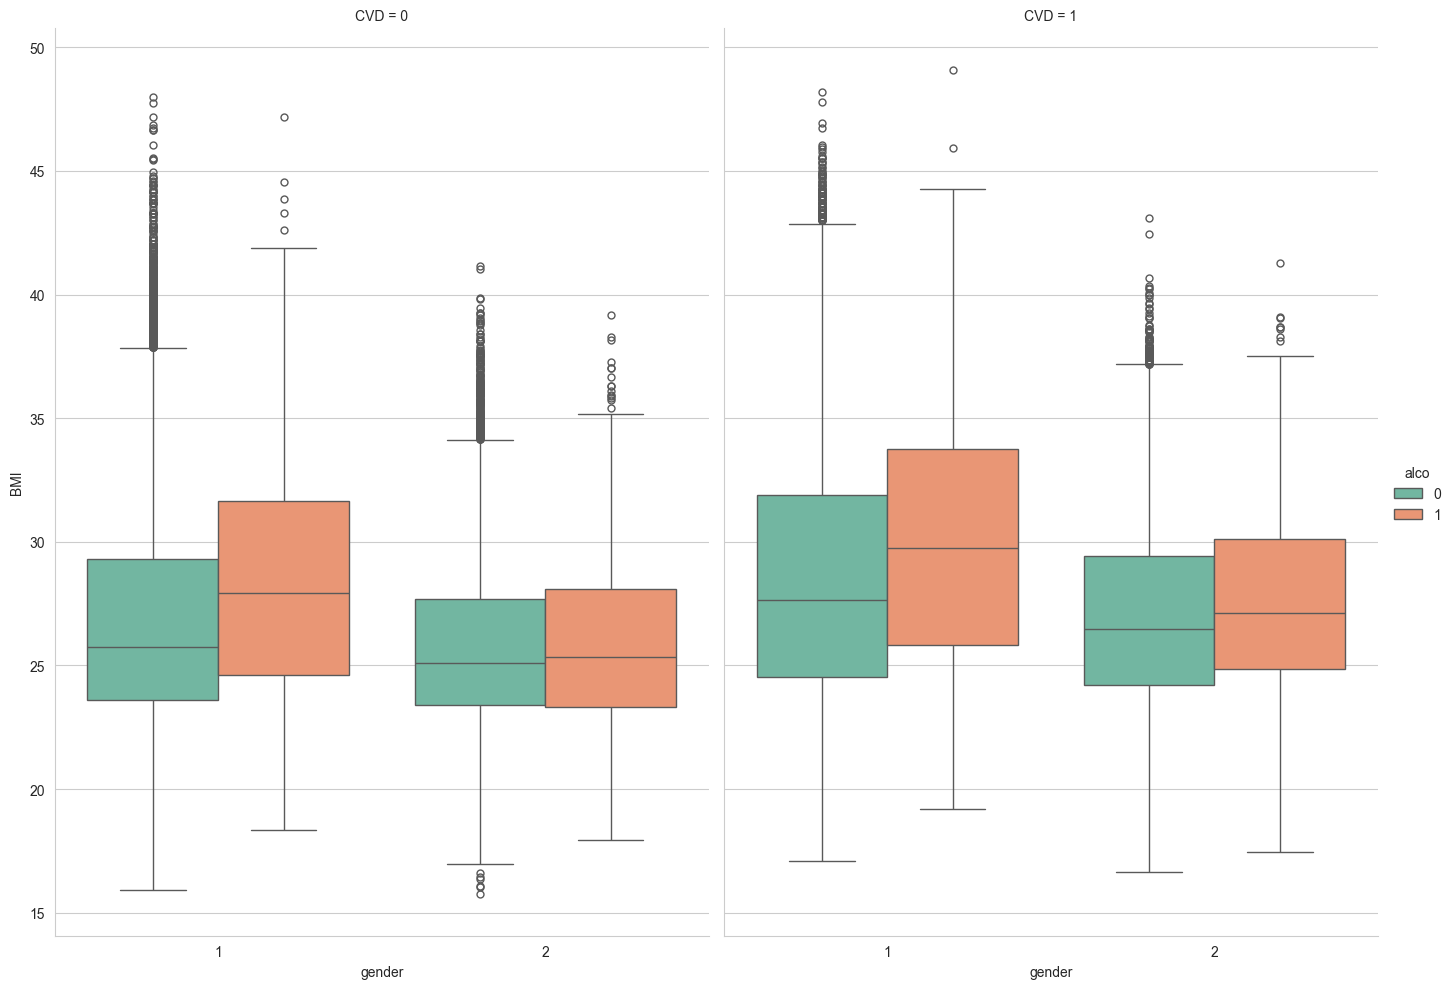

In [39]:
cleaned_df['BMI'] = cleaned_df['weight']/((cleaned_df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="CVD", data=cleaned_df, palette = "Set2" ,kind="box", height=10, aspect=.7);

 Drinking women have higher risks for CVD than drinking men based on thier BMI.

    After cleaning outliers and possible wrong data values we are left with the below rows and columns

In [40]:
cleaned_df.shape

(63224, 14)

Finally, export to CSV

In [41]:
cleaned_df.to_csv("cleaned_cardiovascular_data.csv", index=False)